In [1]:
#In this equation:
#ˆ
#𝛉 is the value of θ that minimizes the cost function.
#y is the vector of target values containing y(1) to y(m).
#Let’s generate some linear-looking data to test this equation on (Figure 4-1):

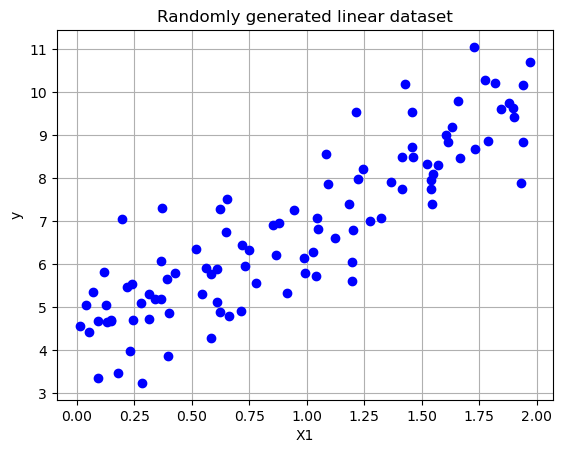

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

plt.plot(X, y, 'bo')
plt.grid(True)
plt.xlabel("X1")
plt.ylabel('y')
plt.title('Randomly generated linear dataset')
plt.show()

In [3]:
#Now lets compute theta using Normal equation. We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a 
#matrix, and the dot() method for matrix multiplication:

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) #adds x0 = 1 to each instance
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [4]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
#The function that we used to generate the data is y = 4 + 3x1 + Gaussian noise. Let’s see what the equation found:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
#We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close enough, 
#but the noise made it impossible to recover the exact parameters of 
#the original function. The smaller and noisier the dataset, the harder it gets.


#Now we can make predictions using 𝛉:

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) ## add x0 = 1 to each instance
X_new_b[:2]


array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

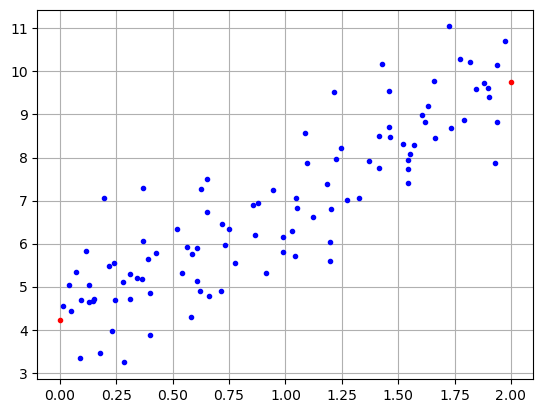

In [8]:
plt.plot(X_new, y_predict, "r.", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.show()

In [9]:
X_new

array([[0],
       [2]])

In [10]:
y_predict

array([[4.21509616],
       [9.75532293]])

In [11]:
#Performing linear regression using Scikit-Learn is 
#relatively straightforward:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new) #the same results as in cell [9] above.
#tells you that doing predictions manually with the formula from cell
#[6] gives you same results as just running stuff with scikit-learn

array([[4.21509616],
       [9.75532293]])

In [13]:
#Notice that Scikit-Learn separates the bias term (intercept_) from 
#the feature weights (coef_). The LinearRegression class is based on the
#scipy.linalg.lstsq() function (the name stands for “least squares”), 
#which you could call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [14]:
X_b[:5], y[:5]

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 array([[6.33428778],
        [9.40527849],
        [8.48372443],
        [5.60438199],
        [4.71643995]]))

In [15]:
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [16]:
#This function computes 𝛉 , where is the pseudoinverse of X 
#(specifically, the Moore–Penrose inverse). You can use np.linalg.pinv() 
#to compute the pseudoinverse directly:

np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [17]:
#Computational Complexity
#The Normal equation computes the inverse of X⊺ X, which is an (n + 1) × 
#(n + 1) matrix (where n is the number of features). The computational 
#complexity of inverting such a matrix is typically about O(n2.4) to O(n3)
#, depending on the implementation. In other words, if you double the 
#number of features, you multiply the computation time by roughly 
#22.4 = 5.3 to 23 = 8. The SVD approach used by Scikit-Learn’s 
#LinearRegression class is about O(n2). If you double the number of 
#features, you multiply the computation time by roughly 4.

#Also, once you have trained your linear regression model (using the 
#Normal equation or any other algorithm), predictions are very fast:
#the computational complexity is linear with regard to both the number
#of instances you want to make predictions on and the number of 
#features. In other words, making predictions on twice as many 
#instances (or twice as many features) will take roughly twice as 
#much time.

#Now we will look at a very different way to train a linear 
#regression model, which is better suited for cases where there are 
#a large number of features or too many training instances to fit 
#in memory.

#Gradient Descent
#Gradient descent is a generic optimization algorithm capable of 
#finding optimal solutions to a wide range of problems. The general 
#idea of gradient descent is to tweak parameters iteratively in order
#to minimize a cost function. Suppose you are lost in the mountains in a 
#dense fog, and you can only feel the slope of the ground below your 
#feet. A good strategy to get to the bottom of the valley quickly is 
#to go downhill in the direction of the steepest slope. This is exactly
#what gradient descent does: it measures the local gradient of the error
#function with regard to the parameter vector θ, and it goes in the 
#direction of descending gradient. Once the gradient is zero, you 
#have reached a minimum!
#In practice, you start by filling θ with random values (this is 
#called random initialization). Then you improve it gradually, 
#taking one baby step at a time, each step attempting to decrease
#the cost function (e.g., the MSE), until the algorithm converges to 
#a minimum (see Figure 4-3).

#Fortunately, the MSE cost function for a linear regression model 
#happens to be a convex function, which means that if you pick any 
#two points on the curve, the line segment joining them is never 
#below the curve. This implies that there are no local minima, 
#just one global minimum. It is also a continuous function with
#a slope that never changes abruptly.2 These two facts have a great
#consequence: gradient descent is guaranteed to approach arbitrarily 
#closely the global minimum (if you wait long enough and if the 
#learning rate is not too high).


#nice explanation on the page 208 with figures!!!

#Let’s look at a quick implementation of this algorithm:

eta = 0.1 #learning rate
n_epochs = 1000
m = len(X_b) #number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) #random initialized model parameters
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [18]:
#That wasn’t too hard! Each iteration over the training set is called 
#an epoch. Let’s look at the resulting theta:
theta

array([[4.21509616],
       [2.77011339]])

In [19]:
range(n_epochs)
#nice visual explanation of epochs in figures on pagew 213

range(0, 1000)

In [20]:
#You may wonder how to set the number of epochs. If it is too low, 
#you will still be far away from the optimal solution when the 
#algorithm stops; but if it is too high, you will waste time while 
#the model parameters do not change anymore. A simple solution is 
#to set a very large number of epochs but to interrupt the algorithm
#when the gradient vector becomes tiny—that is, when its norm becomes
#smaller than a tiny number ε (called the tolerance)—because this 
#happens when gradient descent has (almost) reached the minimum.

#Stochastic Gradient Descent
#The main problem with batch gradient descent is the fact that it uses 
#the whole training set to compute the gradients at every step, which
#makes it very slow when the training set is large. At the opposite 
#extreme, stochastic gradient descent picks a random instance in the 
#training set at every step and computes the gradients based only on
#that single instance. Obviously, working on a single instance at a 
#time makes the algorithm much faster because it has very little data
#to manipulate at every iteration. It also makes it possible to train 
#on huge training sets, since only one instance needs to be in memory 
#at each iteration (stochastic GD can be implemented as an out-of-core 
#algorithm.

#On the other hand, due to its stochastic (i.e., random) nature, 
#this algorithm is much less regular than batch gradient descent: 
#instead of gently decreasing until it reaches the minimum, the cost
#function will bounce up and down, decreasing only on average. Over 
#time it will end up very close to the minimum, but once it gets there 
#it will continue to bounce around, never settling down (see Figure 4-9).
#Once the algorithm stops, the final parameter values will be good, 
#but not optimal.

#When the cost function is very irregular (as in Figure 4-6), this 
#can actually help the algorithm jump out of local minima, so 
#stochastic gradient descent has a better chance of finding the global 
#minimum than batch gradient descent does. Therefore, randomness is 
#good to escape from local optima, but bad because it means that 
#the algorithm can never settle at the minimum. One solution to
#this dilemma is to gradually reduce the learning rate. The steps 
#start out large (which helps make quick progress and escape local 
#minima), then get smaller and smaller, allowing the algorithm to 
#settle at the global minimum. This process is akin to simulated 
#annealing, an algorithm inspired by the process in metallurgy of 
#annealing, where molten metal is slowly cooled down. The function 
#that determines the learning rate at each iteration is called the
#learning schedule. If the learning rate is reduced too quickly, 
#you may get stuck in a local minimum, or even end up frozen halfway
#to the minimum. If the learning rate is reduced too slowly, you may
#jump around the minimum for a long time and end up with a suboptimal
#solution if you halt training too early.


#This code implements stochastic gradient descent using a simple 
#learning schedule.

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index +1]
        gradients = 2 * xi.T @ (xi @ theta - yi) #for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients


In [21]:
theta

array([[4.21076011],
       [2.74856079]])

In [22]:
#To perform linear regression using stochastic GD with Scikit-Learn, 
#you can use the SGDRegressor class, which defaults to optimizing the
#MSE cost function. The following code runs for maximum 1,000 epochs 
#(max_iter) or until the loss drops by less than 10–5 (tol) during 100 
#epochs (n_iter_no_change). It starts with a learning rate of 0.01 
#(eta0), using the default learning schedule (different from the one 
#we used). Lastly, it does not use any regularization (penalty=None; 
#more details on this shortly):


from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,
                      eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) #y.ravel()

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [23]:
y.ravel().shape

(100,)

In [24]:
y.shape

(100, 1)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [26]:
#Polynomial Regression

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

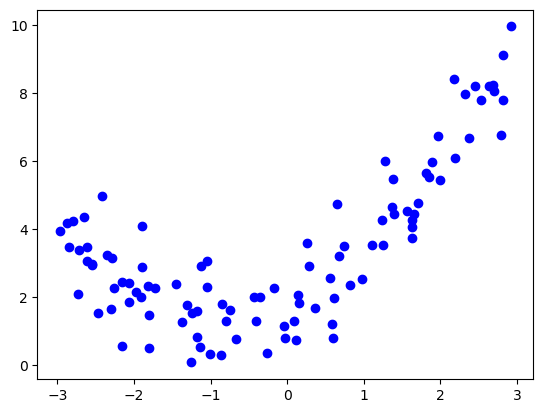

In [27]:
plt.plot(X, y, 'bo')

In [28]:
#Clearly, a straight line will never fit this data properly. So let’s 
#use Scikit-Learn’s PolynomialFeatures class to transform our training 
#data, adding the square (second-degree polynomial) of each feature in 
#the training set as a new feature (in this case there is just one
#feature):

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [29]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [30]:
X_poly[:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [31]:
#X_poly now contains the original feature of X plus the square of 
#this feature. Now we can fit a LinearRegression model to this 
#extended training data

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [32]:
# original function had 0.5 for x1 ** 2, and 1 for x1 and 2 for intercept
#here the linear reg captures the relationship with estimated:
# 0.56 for x1 ** 2, 0.93 for x1 and 1.78 for intercept.

#not bad!

#PolynomialFeatures(degree=d) transforms an array containing n features 
#into an array containing (n + d)! / d!n! features, where n! is the 
#factorial of n, equal to 1 × 2 × 3 × × n. Beware of the combinatorial 
#explosion of the number of features!
 

#If you perform high-degree polynomial regression, you will likely fit 
#the training data much better than with plain linear regression. For 
#example, Figure 4-14 applies a 300-degree polynomial model to the 
#preceding training data, and compares the result with a pure linear
#model and a quadratic model (second- degree polynomial). Notice how
#the 300-degree polynomial model wiggles around to get as close as 
#possible to the training instances.

#This high-degree polynomial regression model is severely overfitting 
#the training data, while the linear model is underfitting it. The model
#that will generalize best in this case is the quadratic model, which
#makes sense because the data was generated using a quadratic model. But
#in general you won’t know what function generated the data, so how can
#you decide how complex your model should be? How can you tell that your
#model is overfitting or underfitting the data?


#In Chapter 2 you used cross-validation to get an estimate of a model’s
#generalization performance. If a model performs well on the training 
#data but generalizes poorly according to the cross-validation metrics,
#then your model is overfitting. If it performs poorly on both, then it
#is underfitting. This is one way to tell when a model is too simple or 
#too complex.

#Another way to tell is to look at the learning curves, which are 
#plots of the model’s training error and validation error as a 
#function of the training iteration: just evaluate the model at 
#regular intervals during training on both the training set and the 
#validation set, and plot the results. If the model cannot be trained 
#incrementally (i.e., if it does not support partial_fit() or warm_start),
#then you must train it several times on gradually larger subsets of 
#the training set.

#Scikit-Learn has a useful learning_curve() function to help with this:
#it trains and evaluates the model using cross-validation. By default 
#it retrains the model on growing subsets of the training set, but if
#the model supports incremental learning you can set 
#exploit_incremental_learning=True when calling learning_curve() and 
#it will train the model incrementally instead. The function returns
#the training set sizes at which it evaluated the model, and the 
#training and validation scores it measured for each size and for 
#each cross-validation fold. Let’s use this function to look at the
#learning curves of the plain linear regression model.

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
       LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
       scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [33]:
np.linspace(0.01, 1.0, 40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])

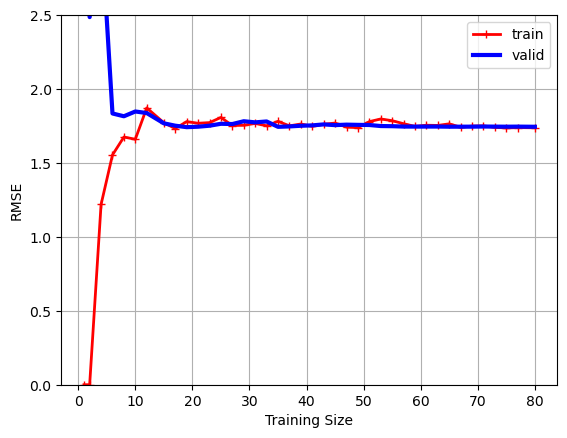

In [34]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid(True)
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.ylim(0, 2.5)
plt.show()

#training size is max 80 because there are 100 instances in the training
#data, and with 5-fold CV it means that max number of training set size
#is 80, given that validation set has to be 20

#This model is underfitting. To see why, first let’s look at the training
#error. When there are just one or two instances in the training set, 
#the model can fit them perfectly, which is why the curve starts at zero.
#But as new instances are added to the training set, it becomes 
#impossible for the model to fit the training data perfectly, both 
#because the data is noisy and because it is not linear at all. So 
#the error on the training data goes up until it reaches a plateau, 
#at which point adding new instances to the training set doesn’t make
#the average error much better or worse. Now let’s look at the validation
#error. When the model is trained on very few training instances, it is
#incapable of generalizing properly, which is why the validation error
#is initially quite large. Then, as the model is shown more training 
#examples, it learns, and thus the validation error slowly goes down.
#However, once again a straight line cannot do a good job of modeling 
#the data, so the error ends up at a plateau, very close to the other
#curve.

#These learning curves are typical of a model that’s underfitting. 
#Both curves have reached a plateau; they are close and fairly high.

#If your model is underfitting the training data, adding more training
#examples will not help. You need to use a better model or come up 
#with better features.

In [35]:
#Now let’s look at the learning curves of a 10th-degree polynomial 
#model on the same data (Figure 4-16):

from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False), 
    LinearRegression())


In [36]:
polynomial_regression

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('linearregression', LinearRegression())])

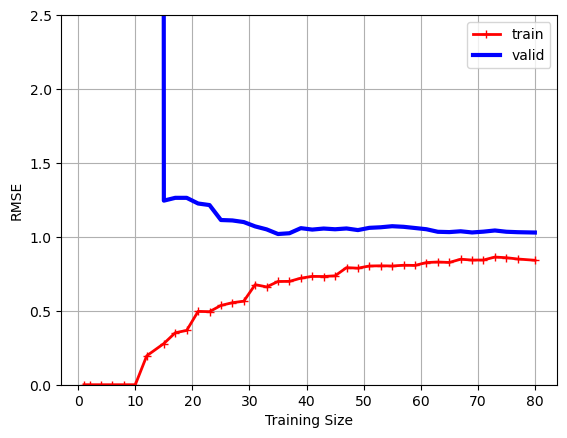

In [37]:
train_sizes, train_scores, valid_scores = learning_curve(
       polynomial_regression, X, y, 
       train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
       scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid(True)
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.ylim(0, 2.5)
plt.legend(loc="upper right")
plt.show()

In [38]:
#These learning curves look a bit like the previous ones, but there 
#are two very important differences:
#The error on the training data is much lower than before.
#There is a gap between the curves. This means that the model 
#performs significantly better on the training data than on the 
#validation data, which is the hallmark of an overfitting model. 
#If you used a much larger training set, however, the two curves 
#would continue to get closer.

#TIP
#One way to improve an overfitting model is to feed it more training 
#data until the validation error reaches the training error.


#THE BIAS/VARIANCE TRADE-OFF
#An important theoretical result of statistics and machine learning is 
#the fact that a model’s generalization error can be expressed as the 
#sum of three very different errors:
#Bias
#This part of the generalization error is due to wrong assumptions, 
#such as assuming that the data is linear when it is actually quadratic.
#A high-bias model is most likely to underfit the training data.

#Variance
#This part is due to the model’s excessive sensitivity to small 
#variations in the training data. A model with many degrees of 
#freedom (such as a high- degree polynomial model) is likely to have 
#high variance and thus overfit the training data.

#Irreducible error
#This part is due to the noisiness of the data itself. The only way to
#reduce this part of the error is to clean up the data (e.g., fix the
#data sources, such as broken sensors, or detect and remove outliers).
#Increasing a model’s complexity will typically increase its variance
#and reduce its bias. Conversely, reducing a model’s complexity 
#increases its bias and reduces its variance. This is why it is 
#called a trade-off.


#Regularized Linear Models
#As you saw in Chapters 1 and 2, a good way to reduce overfitting is
#to regularize the model (i.e., to constrain it): the fewer degrees of 
#freedom it has, the harder it will be for it to overfit the data. A 
#simple way to regularize a polynomial model is to reduce the number 
#of polynomial degrees.

#For a linear model, regularization is typically achieved by constraining
#the weights of the model. We will now look at ridge regression, 
#lasso regression, and elastic net regression, which implement three 
#different ways to constrain the weights.

In [39]:
#As with linear regression, we can perform ridge regression either by 
#computing a closed-form equation or by performing gradient descent. 
#The pros and cons are the same. Equation 4-9 shows the closed-form 
#solution, where A is the (n + 1) × (n + 1) identity matrix,9 except 
#with a 0 in the top-left cell, corresponding to the bias term.
#Here is how to perform ridge regression with Scikit-Learn using a 
#closed-form solution (a variant of Equation 4-9 that uses a matrix 
#factorization technique by André-Louis Cholesky):

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [40]:
#And using stochastic gradient descent:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                      max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) #y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])




array([4.82830117])

In [41]:
#The RidgeCV class also performs ridge regression, but it automatically
#tunes hyperparameters using cross-validation. It’s roughly equivalent 
#to using GridSearchCV, but it’s optimized for ridge regression and runs
#much faster. Several other estimators (mostly linear) also have 
#efficient CV variants, such as LassoCV and ElasticNetCV.

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])



array([4.77621741])

In [42]:
#Elastic Net Regression
#Elastic net regression is a middle ground between ridge regression 
#and lasso regression. The regularization term is a weighted sum of 
#both ridge and lasso’s regularization terms, and you can control
#the mix ratio r. When r = 0, elastic net is equivalent to ridge 
#regression, and when r = 1, it is equivalent to lasso regression
#(Equation 4-12).

#So when should you use elastic net regression, or ridge, lasso, or 
#plain linear regression (i.e., without any regularization)? It is 
#almost always preferable to have at least a little bit of 
#regularization, so generally you should avoid plain linear regression. 
#Ridge is a good default, but if you suspect that only a few features
#are useful, you should prefer lasso or elastic net because they tend 
#to reduce the useless features’ weights down to zero, as discussed 
#earlier. In general, elastic net is preferred over lasso because 
#lasso may behave erratically when the number of features is greater 
#than the number of training instances or when several features are 
#strongly correlated.

#Here is a short example that uses Scikit-Learn’s ElasticNet 
#(l1_ratio corresponds to the mix ratio r):

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

In [43]:
#Early Stopping
#A very different way to regularize iterative learning algorithms such
#as gradient descent is to stop training as soon as the validation 
#error reaches a minimum. This is called early stopping. Figure 4-20 
#shows a complex model (in this case, a high- degree polynomial 
#regression model) being trained with batch gradient descent on the
#quadratic dataset we used earlier. As the epochs go by, the algorithm
#learns, and its prediction error (RMSE) on the training set goes down,
#along with its prediction error on the validation set. After a while,
#though, the validation error stops decreasing and starts to go back up.
#This indicates that the model has started to overfit the training data.
#With early stopping you just stop training as soon as the validation
#error reaches the minimum. It is such a simple and efficient
#regularization technique that Geoffrey Hinton called it a “beautiful
#free lunch”.


#Here is a basic implementation of early stopping:

from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, y_train, X_valid, y_valid = X[:80], y[:80], X[80:], y[80:]

preprocessing = make_pipeline(PolynomialFeatures(degree=90,
                                                include_bias=False),
                             StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')


for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
        
        
        
#This code first adds the polynomial features and scales all the input
#features, both for the training set and for the validation set (the 
#code assumes that you have split the original training set into a 
#smaller training set and a validation set). Then it creates an 
#SGDRegressor model with no regularization and a small learning rate.
#In the training loop, it calls partial_fit() instead of fit(), to 
#perform incremental learning. At each epoch, it measures the RMSE on
#the validation set. If it is lower than the lowest RMSE seen so far,
#it saves a copy of the model in the best_model variable. This 
#implementation does not actually sto p training, but it lets you 
#revert to the best model after training. Note that the model is 
#copied using copy.deepcopy(), because it copies both the model’s 
#hyperparameters and the learned parameters. In contrast, 
#sklearn.base.clone() only copies the model’s hyperparameters.

#Logistic Regression

#As discussed in Chapter 1, some regression algorithms can be used 
#for classification (and vice versa). Logistic regression (also called 
#logit regression) is commonly used to estimate the probability that
#an instance belongs to a particular class (e.g., what is the 
#probability that this email is spam?). If the estimated probability
#is greater than a given threshold (typically 50%), then the model
#predicts that the instance belongs to that class (called the positive
#class, labeled “1”), and otherwise it predicts that it does not
#(i.e., it belongs to the negative class, labeled “0”). This makes
#it a binary classifier.

#Estimating Probabilities
#So how does logistic regression work? Just like a linear regression 
#model, a logistic regression model computes a weighted sum of the 
#input features (plus a bias term), but instead of outputting the 
#result directly like the linear regression model does, it outputs 
#the logistic of this result (see Equation 4-13).
    
#The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) 
#that outputs a number between 0 and 1. 

#Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so 
#a logistic regression model using the default threshold of 50% 
#probability predicts 1 if θ⊺ x is positive and 0 if it is negative.



#The cost function over the whole training set is the average cost over 
#all training instances. It can be written in a single expression 
#called the log loss, shown in Equation 4-17.

#Decision Boundaries
#We can use the iris dataset to illustrate logistic regression. This 
#is a famous dataset that contains the sepal and petal length and 
#width of 150 iris flowers of three different species: Iris setosa, 
#Iris versicolor, and Iris virginica (see Figure 4-22).

#Let’s try to build a classifier to detect the Iris virginica type 
#based only on the petal width feature. The first step is to load the
#data and take a quick peek:


In [44]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [47]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
#Next we’ll split the data and train a logistic regression 
#model on the training set:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
X
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

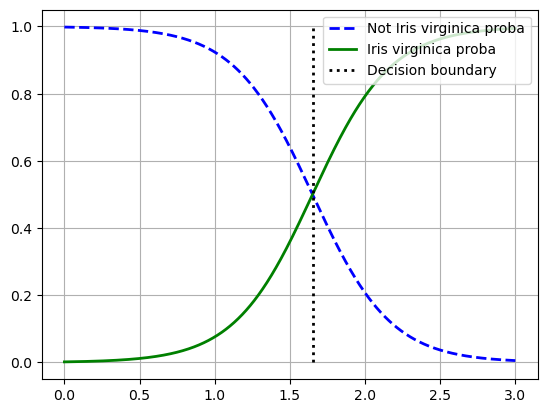

In [88]:
#Let’s look at the model’s estimated probabilities for flowers with
#petal widths varying from 0 cm to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector 
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0] #first number where 
#probability is higher or equal to 0.5
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
            label="Not Iris virginica proba")

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", 
         linewidth=2, label="Decision boundary")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [89]:
decision_boundary

1.6516516516516517

In [90]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [91]:
#Just like the other linear models, logistic regression models 
#can be regularized using l1 or l2 penalties. Scikit-Learn actually 
#adds an l2 penalty by default.

#softmax regression
#Now you can compute the gradient vector for every class, then use 
#gradient descent (or any other optimization algorithm) to find the 
#parameter matrix Θ that minimizes the cost function.

#Let’s use softmax regression to classify the iris plants into all 
#three classes. Scikit-Learn’s LogisticRegression classifier uses 
#softmax regression automatically when you train it on more than 
#two classes (assuming you use solver="lbfgs", which is the default).
#It also applies l2 regularization by default, which you can control 
#using the hyperparameter C, as mentioned earlier:

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=30, random_state=42)

In [92]:
#So the next time you find an iris with petals that are 5 cm long 
#and 2 cm wide, you can ask your model to tell you what type of iris 
#it is, and it will answer Iris virginica (class 2) with 96% 
#probability (or Iris versicolor with 4% probability):

softmax_reg.predict([[5, 2]])

array([2])

In [93]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])